In [102]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

df = pd.read_csv('combined_df.csv',thousands=',')
df.head()

,Name,Action,2018/19,2019/20,2020/21,2021/22,2022/23,May2023/24
0,Algeria,consumption,2080,2124,1936,1889,1682,1897
1,Algeria,ending,420,430,387,377,336,375
2,Algeria,export,208,334,364,366,360,365
3,Algeria,import,2328,2468,2257,2245,2001,2301
4,Argentina,production,1570,1750,1830,1700,1670,1690


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        135 non-null    object
 1   Action      135 non-null    object
 2   2018/19     135 non-null    int64 
 3   2019/20     135 non-null    int64 
 4   2020/21     135 non-null    int64 
 5   2021/22     135 non-null    int64 
 6   2022/23     135 non-null    int64 
 7   May2023/24  135 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 8.6+ KB


In [104]:
df = df.rename({'Name':'Country'},axis=1)

In [105]:
dummy_df = []
action_list = df['Action'].unique()
num_cols = ['2018/19','2019/20', '2020/21','2021/22','2022/23','May2023/24']
df.drop('May2023/24',inplace=True,axis=1)
df.columns = ['Country','Action','2018','2019','2020','2021','2022']
for action in action_list:
    temp_df = df[df['Action'] == action].copy()
    temp_df.drop('Action',inplace=True,axis=1)
    temp_df = temp_df[(temp_df['Country']!='Total' ) and (df['Country']!='Other')]
    dummy_df.append(temp_df.melt(id_vars='Country',var_name='Year',value_name=action).reset_index(drop=True))
consump_df, end_df, export_df, import_df, prod_df = dummy_df
consump_df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [97]:
consump_df.sort_values(['Year','consumption'],ascending=False)

,Country,Year,consumption
120,Other,2022,33097
112,India,2022,29500
111,European_Union,2022,17000
107,China,2022,15500
128,United_States,2022,11498
...,...,...,...
12,Korea_South,2018,1668
21,Sudan,2018,1627
15,Nigeria,2018,1610
25,Vietnam,2018,1597


<Axes: xlabel='Country', ylabel='consumption'>

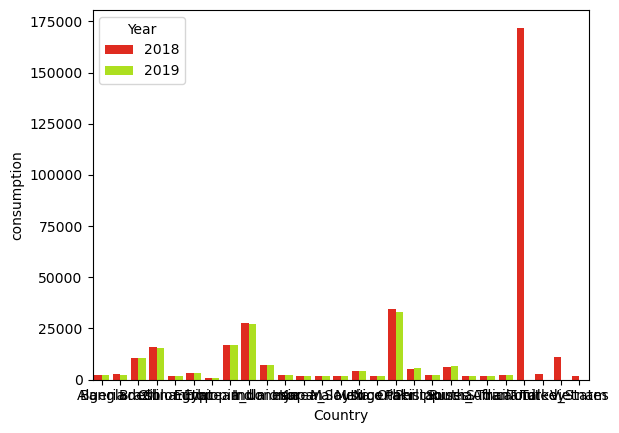

In [80]:
sns.barplot(data=consump_df.head(50), x='Country', y = 'consumption',hue='Year',palette=sns.hls_palette(5, l=0.5, s=1))
# y = ['2018/19','2019/20', '2020/21','2021/22','2022/23','May2023/24']